<a href="https://colab.research.google.com/github/Karthikard/ML-projects/blob/main/email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_excel('emaill.xlsx')

In [3]:
df.head()

,subject,body,category
0,Two-step verification code: 426706,"For account verification, enter: 924578. Do no...",verify_code
1,Secure access number: 892974,Enter 426706 to verify password reset. Session...,verify_code
2,Apple verification: 713300,Code: 880677 for login confirmation. Do not sh...,verify_code
3,Microsoft withdrawal auth: 383921,Token: 202896 expires at 09:45 EST. For suppor...,verify_code
4,GitHub verification: 995304,PIN 143774 required for password reset on Apple.,verify_code


Natural Language Toolkit (NLTK) : for text processing and natural language processing (NLP) tasks such as tokenization, stemming, lemmatization, POS tagging, and more.

**Tokenization :** Breaking text into smaller units (tokens), usually words or sentences. "hello","how","are","u".

**Stemming :** Reducing words to their root or base form by chopping off suffixes. running --> run , happily --> happili(may not produce real words)

**Lemmatization :** Reducing words to their dictionary/base form (lemma), using context and part of speech.("running", pos="v")  # Output: run
("better", pos="a")  # Output: good

**POS Tagging** (Part-of-Speech Tagging) :
Labeling each word with its part of speech (noun, verb, adjective, etc.).

**Stopwords :** Stopwords are common words like "the", "is", "and"

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

Download NLTK data

WordNet: A large lexical database of English, used for lemmatization.

OMW (Open Multilingual WordNet): Provides additional word forms and supports multiple languages

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
#Replaces any missing values (NaN) in the subject column with an empty string ''.
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('') #combining the subject and body columns
df['text'] . head()

,text
0,Two-step verification code: 426706 For account...
1,Secure access number: 892974 Enter 426706 to v...
2,Apple verification: 713300 Code: 880677 for lo...
3,Microsoft withdrawal auth: 383921 Token: 20289...
4,GitHub verification: 995304 PIN 143774 require...


Text Preprocessing Function

In [7]:
import re

In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Lowercase
    #text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers.Keeps only letter and spaces.
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = text.split() #Tokenize by splitting on spaces and splitters
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize & remove stopwords
    return ' '.join(words)   #Join back into a single string

df['text_clean'] = df['text'].apply(preprocess_text)

Encode Labels converts strings to numbers for category. similar to one hot encoder

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_label'] = le.fit_transform(df['category'])

In [10]:
df.head()

,subject,body,category,text,text_clean,category_label
0,Two-step verification code: 426706,"For account verification, enter: 924578. Do no...",verify_code,Two-step verification code: 426706 For account...,twostep verification code 426706 account verif...,6
1,Secure access number: 892974,Enter 426706 to verify password reset. Session...,verify_code,Secure access number: 892974 Enter 426706 to v...,secure access number 892974 enter 426706 verif...,6
2,Apple verification: 713300,Code: 880677 for login confirmation. Do not sh...,verify_code,Apple verification: 713300 Code: 880677 for lo...,apple verification 713300 code 880677 login co...,6
3,Microsoft withdrawal auth: 383921,Token: 202896 expires at 09:45 EST. For suppor...,verify_code,Microsoft withdrawal auth: 383921 Token: 20289...,microsoft withdrawal auth 383921 token 202896 ...,6
4,GitHub verification: 995304,PIN 143774 required for password reset on Apple.,verify_code,GitHub verification: 995304 PIN 143774 require...,github verification 995304 pin 143774 required...,6


In [11]:
df.shape

(15191, 6)

Split Data

In [12]:
from sklearn.model_selection import train_test_split

X = df['text_clean']
y = df['category_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**TF-IDF Vectorization **
To convert text into numerical features.

TF (Term Frequency): How often a word appears in a document.

IDF (Inverse Document Frequency): How rare a word is across all documents.

TF-IDF: Gives higher weight to important words and lower weight to common words (like “the”, “is”).

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Grid Search

In [14]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_params ={
    'svm' :
    {
        'model' : svm.SVC(gamma = 'auto'),
        'params' :
        {
            'C' : [1,10,20] ,
            'kernel' : ['rbf','linear']
        }
    },

    'dt' :
    {
        'model' : DecisionTreeClassifier(),
        'params' :
        {
            'criterion' : ['gini','entropy'],
            'splitter' : ['best' , 'random']
        }
    },

    'lr' :
    {
        'model' : LogisticRegression(max_iter=1000),
        'params' :
        {
            'C' : [1,5,10],
            'penalty' : ['l1','l2'],
            'solver' : ['liblinear']
        }
    },
    'mnb' :
    {
        'model' : MultinomialNB(),
        'params' : {}
    }

}

In [15]:
scores = []

for model_name , mp in model_params.items():
  clf = GridSearchCV(mp['model'] , mp['params'] , cv = 5 , return_train_score = False)
  clf.fit(X_train_tfidf, y_train)
  scores.append(
      {
          'model' : model_name,
          'best_score' : clf.best_score_,
          'best_params' : clf.best_params_
      }
  )

In [17]:
df1 = pd.DataFrame(scores , columns = ['model' , 'best_score' , 'best_params'])
df1

,model,best_score,best_params
0,svm,0.975478,"{'C': 1, 'kernel': 'linear'}"
1,dt,0.946511,"{'criterion': 'gini', 'splitter': 'random'}"
2,lr,0.971939,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}"
3,mnb,0.952354,{}


In [18]:
svm = svm.SVC(C=1, kernel='linear')
svm.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear')

Accuracy: 0.9677525501809806
              precision    recall  f1-score   support

   Important       0.89      0.93      0.91       407
    Personal       0.96      0.92      0.94       399
     finance       0.94      0.94      0.94       390
  promotions       0.99      1.00      0.99       471
social_media       0.99      0.99      0.99       451
        spam       1.00      0.99      0.99       477
 verify_code       1.00      1.00      1.00       444

    accuracy                           0.97      3039
   macro avg       0.97      0.97      0.97      3039
weighted avg       0.97      0.97      0.97      3039



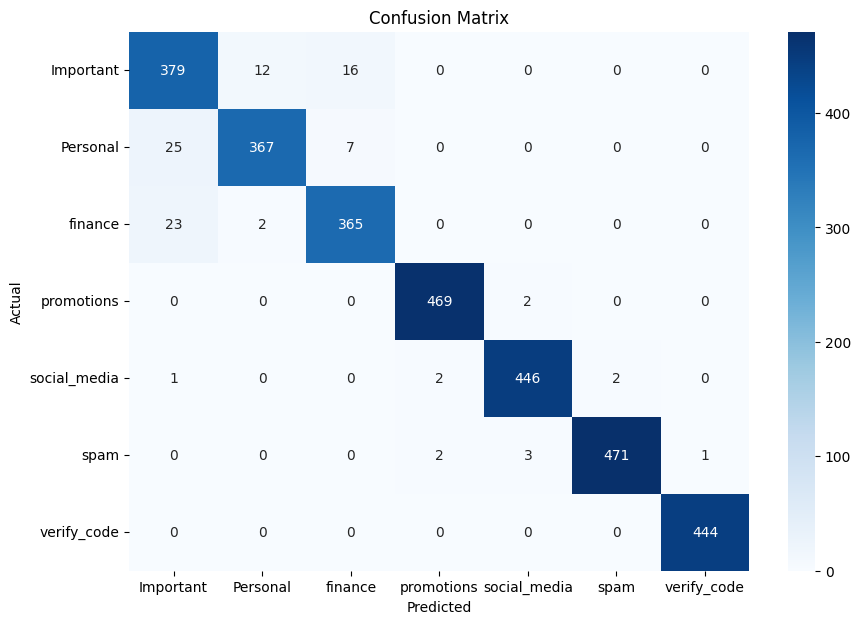

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# Predict on test data
y_pred = svm.predict(X_test_tfidf)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
from xgboost import XGBClassifier

In [23]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:00:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)